In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
glass_type = pd.read_csv('E:\datasets//glass.csv')

In [4]:
glass_type.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Standardize the Variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
ss = StandardScaler()

In [7]:
ss.fit(glass_type.drop('Type',axis=1))


StandardScaler()

In [8]:
features = ss.transform(glass_type.drop('Type',axis=1))
feature_frame = pd.DataFrame(features,columns=glass_type.columns[:-1])
feature_frame


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


Finding the correation among the features

<AxesSubplot:>

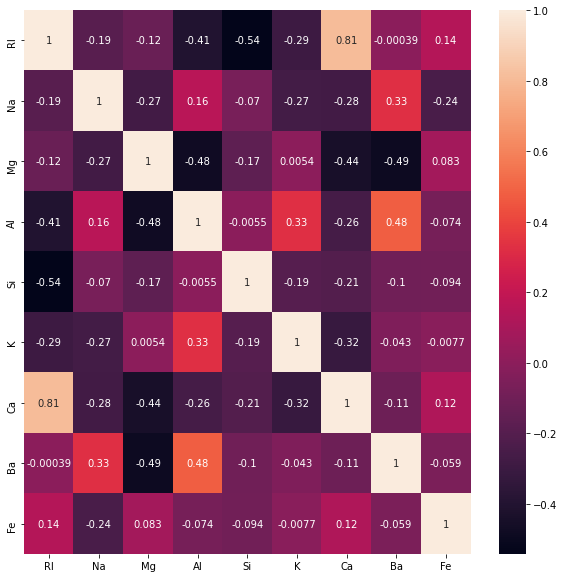

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(feature_frame.iloc[:,0:].corr(),annot=True)


# Train and Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature_frame,glass_type['Type'],
                                                    test_size=0.30)


# Implementing KNN algorithm


In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [13]:
knn = KNeighborsClassifier(n_neighbors=1)


In [14]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

# Predictions and Evaluations


In [16]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score



In [17]:
print(confusion_matrix(y_test,pred))

[[18  1  5  0  0  0]
 [ 8 15  2  2  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  2  0  0  1  0]
 [ 0  1  0  0  0  5]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.64      0.75      0.69        24
           2       0.79      0.56      0.65        27
           3       0.12      0.33      0.18         3
           5       0.33      0.50      0.40         2
           6       1.00      0.33      0.50         3
           7       0.83      0.83      0.83         6

    accuracy                           0.63        65
   macro avg       0.62      0.55      0.54        65
weighted avg       0.70      0.63      0.65        65



Recognising the correct value of K

In [19]:
error_rate = []

for i in range(1,70):
    knn   = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


# Plotting the error rate against the values of K

Text(0, 0.5, 'Error Rate')

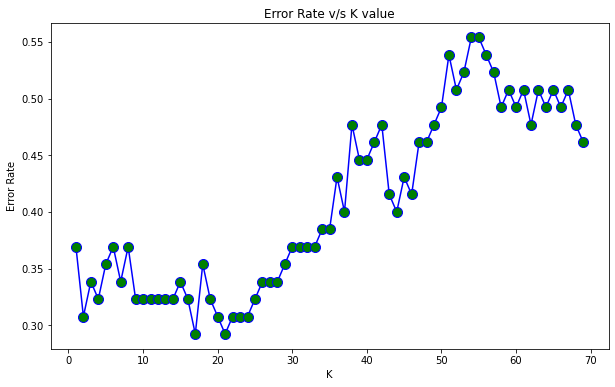

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',linestyle='solid',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K')
plt.ylabel('Error Rate')


# Finding the minimum error rate out of different values of K


In [21]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[21  2  1  0  0  0]
 [ 8 16  0  3  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  0  0  1]
 [ 1  1  0  0  1  0]
 [ 1  0  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.62      0.88      0.72        24
           2       0.80      0.59      0.68        27
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       1.00      0.33      0.50         3
           7       0.83      0.83      0.83         6

    accuracy                           0.66        65
   macro avg       0.54      0.44      0.46        65
weighted avg       0.68      0.66      0.65        65

